In [1]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(1, '/mnt/d/GitHub/pypsa_utilities/eskom data/')

import data_utilities as du
import plotting_utilities as pu
import financial_utilities as fu
import xarray as xr
import cartopy.crs as ccrs

In [2]:
eskom_data=du.eskom_data('../data/ESK2791.csv')

In [15]:
eskom_data['other_re_installed'].groupby(eskom_data.index.year).max().to_clipboard()

In [6]:
eskom_data['loadshed_mlr'].groupby(eskom_data.index.year).sum().to_clipboard()

In [ ]:
df = pd.read_csv('../data/Eskom EAF data.csv',index_col=[1,0],parse_dates=True)
df['capacity'] = df['EAF %']/100 * df['MW'] 


for y in [2017,2018,2019,2020,2021,2022]:
    data=df.loc['Generation Total','PCLF %']
    plt.plot(data[data.index.year==y].values)



In [ ]:
df = pd.read_csv('../data/Eskom EAF data.csv',index_col=[1,0],parse_dates=True)
df['capacity'] = df['EAF %']/100 * df['MW'] 
stations=df[df.type=='coal'].index.get_level_values(0)

In [ ]:
stations

In [ ]:
df = pd.read_csv('../data/Eskom EAF data.csv',index_col=[1,0],parse_dates=True)
df['capacity'] = df['EAF %']/100 * df['MW'] 
stations=df[df.type=='coal'].index.get_level_values(0).unique()
eaf=pd.DataFrame(0,index=stations,columns=range(2017,2023))
planned=pd.DataFrame(0,index=stations,columns=range(2017,2023))
unplanned=pd.DataFrame(0,index=stations,columns=range(2017,2023))
for s in stations:
    eaf.loc[s,:]=df.loc[s,'EAF %'].groupby(df.loc[s,'EAF %'].index.year).mean()
    planned.loc[s,:]=df.loc[s,'PCLF %'].groupby(df.loc[s,'PCLF %'].index.year).mean()
    unplanned.loc[s,:]=df.loc[s,'UCLF %'].groupby(df.loc[s,'UCLF %'].index.year).mean()+df.loc[s,'OCLF %'].groupby(df.loc[s,'OCLF %'].index.year).mean()

In [ ]:
df = pd.read_csv('../data/Eskom EAF data.csv',index_col=[1,0],parse_dates=True)
df['capacity'] = df['EAF %']/100 * df['MW'] 
df=df[df.type=='coal']
df.index=df.index.get_level_values(1)
variable='EAF %'
type_avg=df.groupby(level=0).mean()
type_avg.drop(['MW','capacity'],axis=1)
type_avg.loc[:,variable].groupby(type_avg.index.year).mean()

In [ ]:
df = pd.read_csv('../data/Eskom EAF data.csv',index_col=[1,0],parse_dates=True)
df['capacity'] = df['EAF %']/100 * df['MW'] 
stations=df[df.type=='coal'].index.get_level_values(0)

installed_capacity=pd.DataFrame(0,index=stations,columns=range(2017,2023))
for s in stations:
    for y in range(2017,2023):
        installed_capacity.loc[s,y]=df.loc[(s,str(y)),'MW'].mean()

In [ ]:
installed_capacity.to_clipboard()

In [ ]:
mean_pclf=type_avg[variable].groupby(type_avg.index.month).mean().to_clipboard()
for y in [2017,2018,2019,2020,2021,2022]:
    plt.plot(type_avg.loc[str(y),variable].values)

plt.plot(mean_pclf.values,'k--',linewidth=3)
plt.legend([2017,2018,2019,2020,2021,2022])

In [ ]:
mean_pclf=coal_plants['UCLF %'].groupby(coal_plants.index.month).mean()
for y in [2017,2018,2019,2020,2021,2022]:
    plt.plot(coal_plants.loc[str(y),'UCLF %'].values)

plt.plot(mean_pclf.values,'k--',linewidth=3)
plt.legend([2017,2018,2019,2020,2021,2022])

In [ ]:
plt.plot(eskom_data['coal_eaf'])
plt.plot(df[df.type=='coal'].groupby('Date').sum()['capacity'].divide(df[df.type=='coal'].groupby('Date').sum()['MW']))
plt.ylabel('Coal fleet EAF')

In [22]:
n = pypsa.Network('../results/version-0.6/networks/solved_za-original_10-supply_redz_lcopt_Co2L.nc')

INFO:pypsa.io:Imported network solved_za-original_10-supply_redz_lcopt_Co2L.nc has buses, carriers, generators, global_constraints, lines, loads, storage_units


In [ ]:
# plotting:
#   map:
#     figsize: [7, 7]
#     boundaries: [14, 34, -35, -22] #[x1,x2,y1,y2]
#     p_nom:
#       bus_size_factor: 5.e+4
#       linewidth_factor: 3.e+3 #1.e+3 # 1.e+3  #3.e+3

In [ ]:
supply_regions = gpd.read_file(snakemake.input.supply_regions).buffer(-0.005) #.to_crs(n.crs)
resarea = gpd.read_file(snakemake.input.resarea).to_crs(supply_regions.crs)

(<matplotlib.collections.PatchCollection at 0x7f6d10be7f40>,
 <matplotlib.collections.LineCollection at 0x7f6d10be7070>)

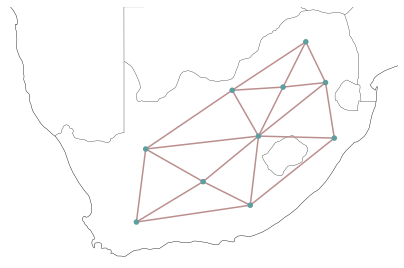

In [38]:
fig, ax = plt.subplots(figsize=[7, 7], subplot_kw={"projection": ccrs.PlateCarree()})
n.plot(ax=ax, boundaries=[14, 34, -35, -22])

In [29]:
n.plot(ax=ax)

(<matplotlib.collections.PatchCollection at 0x7f6d19a628e0>,
 <matplotlib.collections.LineCollection at 0x7f6d19b435e0>)

In [19]:
n.lines[['bus0','bus1','num_parallel','length','s_nom_min']]

,bus0,bus1,num_parallel,length,s_nom_min
Line,,,,,
0,EASTERN CAPE,FREE STATE,0.775623,494.565353,1317.087898
1,EASTERN CAPE,KZN,0.775623,702.781934,1317.087898
2,EASTERN CAPE,NORTHERN CAPE,7.958380,709.406767,13514.145017
4,FREE STATE,GAUTENG,4.712396,381.671114,8002.132162
5,FREE STATE,KZN,1.508830,473.546735,2562.147552
6,FREE STATE,MPUMALANGA,7.225173,569.987267,12269.085363
7,FREE STATE,NORTH WEST,0.775623,366.030831,1317.087898
8,FREE STATE,NORTHERN CAPE,9.509626,674.168985,16148.320813
9,GAUTENG,LIMPOPO,0.366603,354.359250,622.529827


In [18]:
n.lines['s_nom_opt']-n.lines['s_nom_min']

Line
0        0.026466
1      511.364081
2        0.052320
4        0.025606
5      873.306989
6        0.016355
7      574.254739
8        0.016591
9        0.040905
10       0.023069
11    6456.179768
12       0.017079
13       0.028437
14       0.014536
15       0.010777
16       0.096711
dtype: float64

In [255]:
n.generators.p_nom_opt.groupby(n.generators.carrier).sum()

carrier
CCGT       10986.255965
CSP          600.000000
OCGT       19902.625973
biomass      193.060000
coal       18610.042110
diesel      1005.000000
gas          425.000000
hydro       2447.020000
nuclear     1854.062427
onwind     66244.888120
solar      48430.089174
Name: p_nom_opt, dtype: float64

In [237]:
n.storage_units.p_nom_opt.groupby(n.storage_units.carrier=='battery').sum()

carrier
False     2912.000000
True     30977.145211
Name: p_nom_opt, dtype: float64

In [246]:
n.generators_t.p_max_pu['RSA onwind_2040'].mean()

0.36794823059360743

In [245]:
n.generators_t.p['RSA onwind_2040'].mean()/n.generators.p_nom_opt['RSA onwind_2040']

0.31765458296685184

In [253]:
co2_emi = (n.generators_t.p.sum()/n.generators.efficiency * n.generators.carrier.map(n.carriers.co2_emissions)).sum()
co2_emi/1e6

62.6626460703809

In [160]:
n.investment_period_weightings

,objective,years
name,,
2040,1,1


In [ ]:
n.generators_t.p_max_pu.plot()